# Projeto 2

In [1]:
# instalando depencias
!pip3 install numpy
!pip3 install matplotlib
!pip3 install scipy
!pip3 install pydub

  Using cached https://files.pythonhosted.org/packages/e5/e6/c3fdc53aed9fa19d6ff3abf97dfad768ae3afce1b7431f7500000816bda5/numpy-1.17.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/57/4f/dd381ecf6c6ab9bcdaa8ea912e866dedc6e696756156d8ecc087e20817e2/matplotlib-3.1.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/11/fa/0160cd525c62d7abd076a070ff02b2b94de589f1a9789774f17d7c54058e/pyparsing-2.4.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e5/e6/c3fdc53aed9fa19d6ff3abf97dfad768ae3afce1b7431f7500000816bda5/numpy-1.17.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cac

In [176]:
# importando dependencias
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np
import math
import pydub
import time
from pydub import AudioSegment
from pydub.playback import play
from PIL import Image

## DCT

In [4]:
# DCT
def DCT1D(data):
    N = len(data)
    X = np.zeros(N)
    ak = math.sqrt(2.0/N)
    
    for k in range(N):
        ck = math.sqrt(1.0/2.0) if k == 0 else 1        
        s = 0
        
        for n in range(N):
            q = 2.0 * math.pi * k * n
            w = k * math.pi
            two_n = 2.0 * N
            
            s += data[n] * math.cos((q/two_n) + (w/two_n))
        
        X[k] = ak * ck * s
    
    return X

## IDCT

In [5]:
def IDCT1D(data):
    N = len(data)
    x = np.zeros(N)
    
    ak = math.sqrt(2.0/N)
    
    for n in range(N):
        s = 0
        for k in range(N):
            q = 2.0 * math.pi * k * n
            w = k * math.pi
            two_n = 2.0 * N
            ck = math.sqrt(1.0/2.0) if k == 0 else 1
                
            s += ck * data[k] * math.cos((q/two_n) + (w/two_n))
            
        x[n] = ak * s
    
    return x
    

### Testes DCT e IDCT

In [6]:
x = np.array([5.9285,2.1515,0.4693,-0.5441,0.9595,3.6881,4.0156])

X_DCT = DCT1D(x)
X_IDCT = IDCT1D(X_DCT)

In [5]:
x

array([ 5.9285,  2.1515,  0.4693, -0.5441,  0.9595,  3.6881,  4.0156])

In [6]:
X_IDCT

array([ 5.9285,  2.1515,  0.4693, -0.5441,  0.9595,  3.6881,  4.0156])

# Audio

In [7]:
# Read Wav File
filename = "mais.wav"
portion_slice = 2000
base = 20000
audio_rate, audio_data = wavfile.read("./" + filename)
# audio_portion = audio_data[base:base+portion_slice]
audio_portion = audio_data
audio_data.shape

(7516,)

In [8]:
# draw audio wave graph
def plot_audio_wave(data, figsize=[20,6], color="blue", y_label="Amplitude", stroke=0.5, title=""):
    plt.figure('Data', figsize=figsize)
    plt.plot(data, linewidth=stroke,alpha=1,color=color)
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()

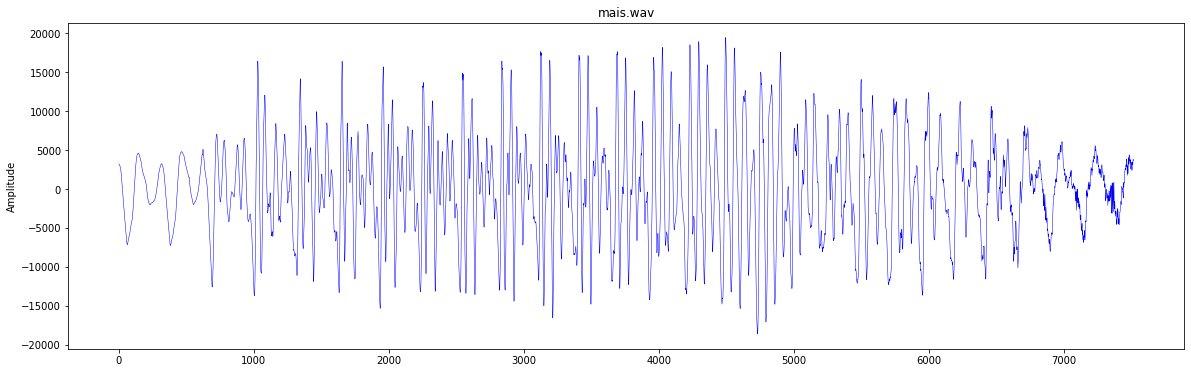

In [10]:
plot_audio_wave(audio_data, title=filename)
# plot_audio_wave(audio_portion, title="{} - {} Slice".format(filename, portion_slice))

## DCT AUDIO

In [13]:
print("DCT audio...")
inicio = time.time()
DCT = DCT1D(audio_portion)
fim = time.time()
print("DCT Done! - took {:3f} seconds" .format((fim - inicio)*1000.0))

DCT audio...
DCT Done! - took 141427.947044 seconds
141.42794704437256 segundos


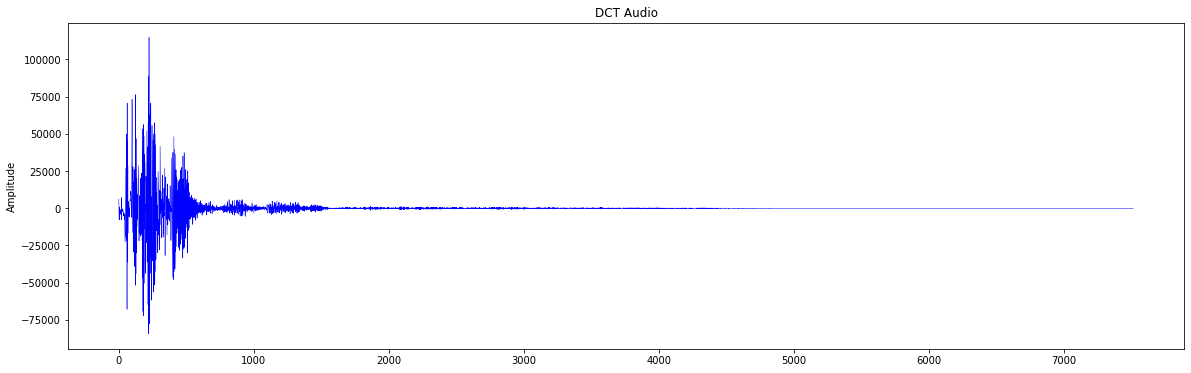

Nivel DC: 6183.561002768557


In [14]:
plot_audio_wave(DCT, title="DCT Audio")
print("Nivel DC: {}".format(DCT[0]))

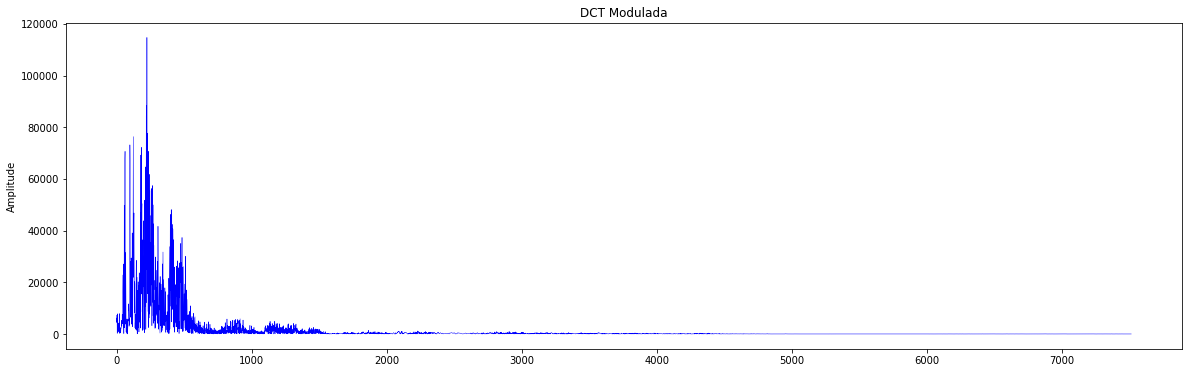

Numero de frequências desejadas?  1000


In [171]:
DCT_filtered = DCT.copy()
DCT_values = DCT_filtered.copy()
selected_frequencies = []

# Valores modulados
for i in range(len(DCT)):
    DCT_values[i] = abs(DCT_values[i])
    
plot_audio_wave(DCT_values, title="DCT Modulada")
num = int(input("Numero de frequências desejadas? "))

In [172]:
aux = DCT_values.copy()
aux_sorted = list(enumerate(aux))

def sortKey(e):
    return e[1]

aux_sorted.sort(key=sortKey)
aux_sorted = aux_sorted[::-1]

selected_frequencies = [aux_sorted[i][0] for i in range(num)]
selected_frequencies.insert(0, aux[0])

# freq_selecionadas

In [173]:
for i in range(len(DCT_filtered)):
    if i not in selected_frequencies:
        DCT_filtered[i] = 0
        
# print(freq_selecionadas)

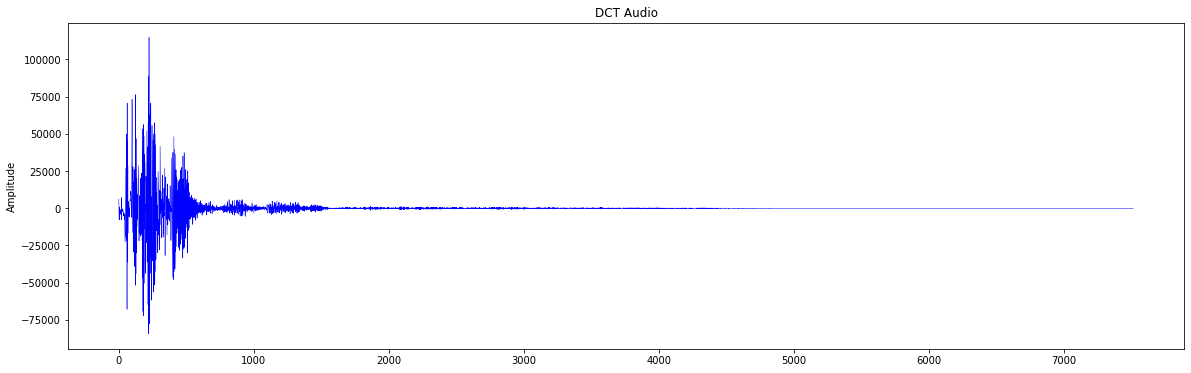

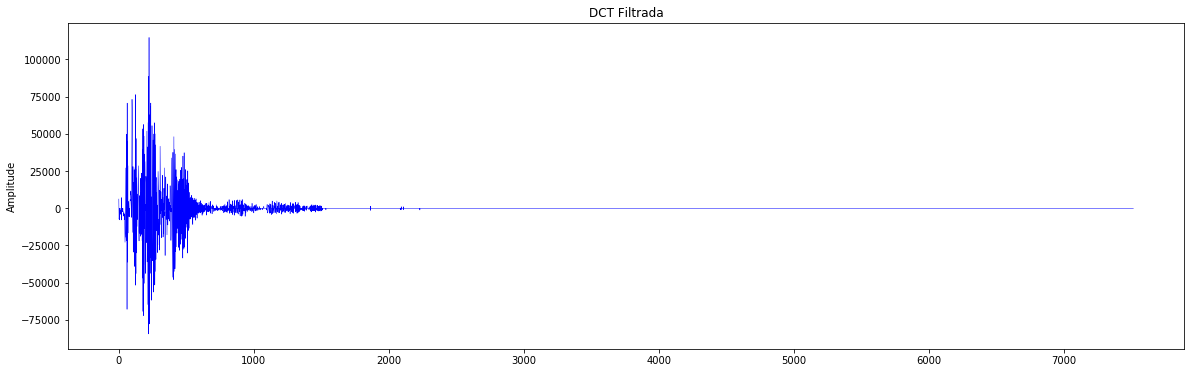

In [174]:
plot_audio_wave(DCT, title="DCT Audio")
plot_audio_wave(DCT_filtered, title="DCT Filtrada")

In [73]:
# IDCT
print("IDCT audio...")
inicio = time.time()
IDCT = IDCT1D(DCT_filtered)
fim = time.time()
print("IDCT Done! - took {:3f} seconds" .format((fim - inicio)*1000.0))


IDCT audio...


KeyboardInterrupt: 

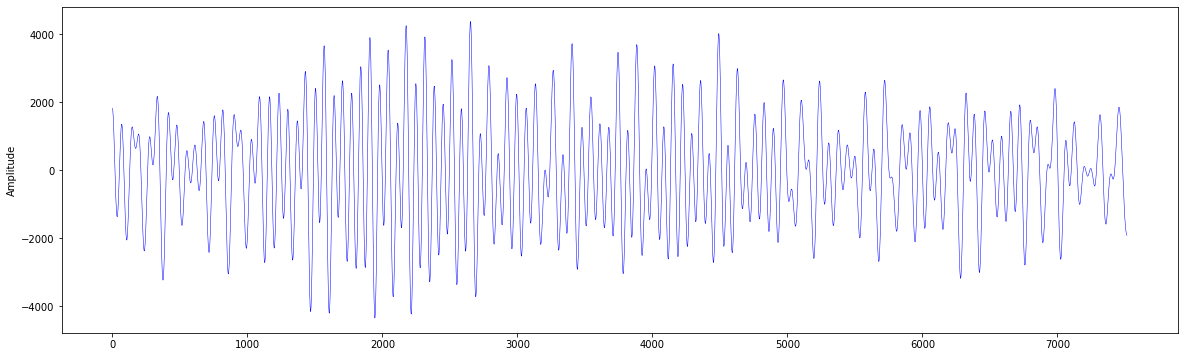

In [59]:
plot_audio_wave(IDCT)

In [175]:
from scipy import fftpack
# audio_tranformado = IDCT1D(DCT)
audio_tranformado = fftpack.idct(DCT_filtered, norm="ortho")
audio_tranformado *= 1.3
audio_tranformado = audio_tranformado.astype("int16")

wavfile.write("IDCT2.wav", audio_rate, audio_tranformado)

# DCT Imagem

In [373]:
# Display the original Image
def show(img_array, scale=(60,6), title = ""):
    plt.figure(figsize = scale)
    plt.title(title)
    plt.imshow(img_array, aspect="equal", origin="upper",cmap='gray')

In [355]:
imagem = Image.open("lena.bmp")
imagem = np.asarray(imagem)
print(imagem)

[[137 135 133 ... 145 147 114]
 [137 137 133 ... 144 148 114]
 [138 133 134 ... 133 125  87]
 ...
 [ 28  29  28 ...  53  61  59]
 [ 20  24  25 ...  64  70  65]
 [ 21  30  25 ...  71  67  72]]


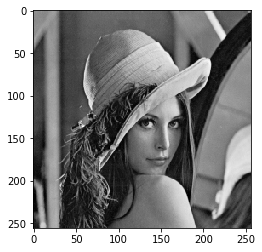

In [356]:
plt.imshow(imagem, cmap="gray")
plt.show()

In [357]:
imagem.shape

(256, 256)

In [358]:
ImagemDCT = np.zeros(imagem.shape)

In [359]:
ImagemDCT.shape

(256, 256)

In [360]:
ImagemDCT

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [361]:
# aplicar DCT verticalmente
inicio = time.time()
for i, linha in enumerate(imagem):
#     ImagemDCT[i] = DCT1D(linha)
    ImagemDCT[i] = fftpack.dct(linha)
fim = time.time()
print("Levou: {}".format((fim - inicio)))
    #     ImagemDCT[i] = fftpack.dct(linha, norm="ortho")

Levou: 0.04674696922302246


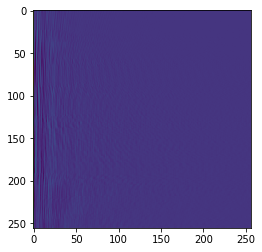

In [362]:
plt.imshow(ImagemDCT)

In [363]:
ImagemDCT_Trans = ImagemDCT.T

In [364]:
# Aplica DCT nas colunas
for i, linha in enumerate(ImagemDCT_Trans):
    ImagemDCT_Trans[i] = fftpack.dct(linha)

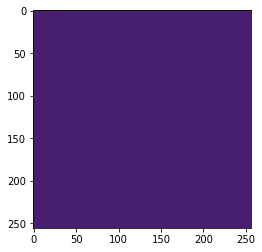

In [365]:
plt.imshow(ImagemDCT_Trans.T)

In [366]:
ImagemDCT_Trans.T[0][0]

25867396.0

In [367]:
a = ImagemDCT_Trans.T

In [387]:
# a[0][0]
a[0][1]

-2383746.9145281096

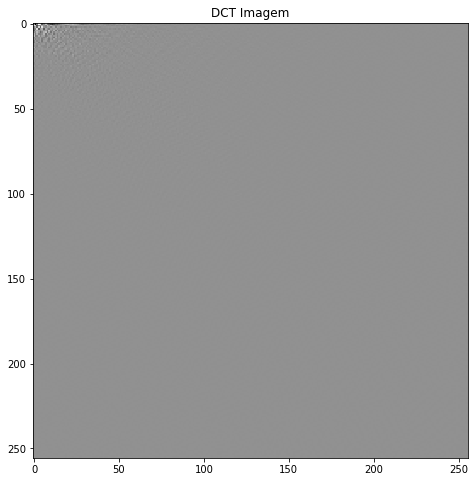

In [374]:
# Zerando o DC
a[0][0] = 0
show(a, title="DCT Imagem", scale=[80,8])
# plt.imshow(a)

# Volta

In [375]:
imgIDCT = np.zeros(imagem.shape)
imgIDCT

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [376]:
for i, linha in enumerate(ImagemDCT_Trans.T):
    imgIDCT[i] = fftpack.idct(linha)

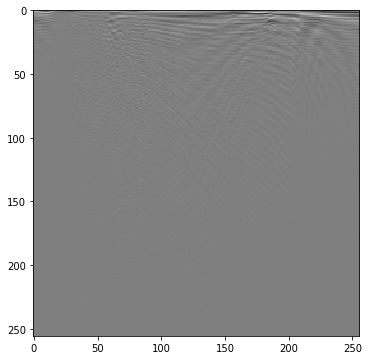

In [380]:
show(imgIDCT)

In [382]:
imgIDCT_Trans = imgIDCT.T

In [383]:
for i, linha in enumerate(imgIDCT_Trans):
    imgIDCT_Trans[i] = fftpack.idct(linha)

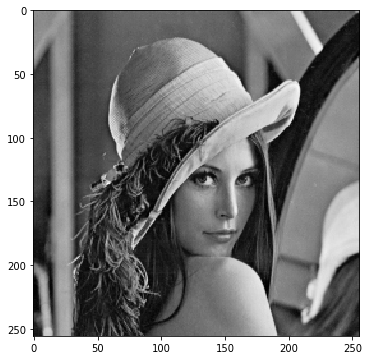

In [384]:
show(imgIDCT_Trans.T)